In [1]:
# importing the libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

11493376/11490434 [==============================] - 0s 0us/step


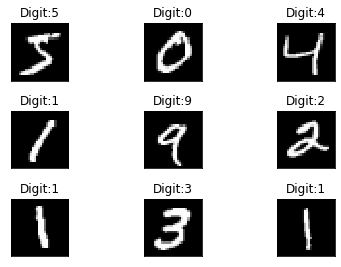

In [2]:
#splitting into train and test images
(x_train,y_train),(x_test,y_test) = mnist.load_data()
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('Digit:'+str(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig.show()

In [3]:
# prepocessing data
x_train = x_train/255
x_test = x_test/255
num_category = 10
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
y_train = keras.utils.to_categorical(y_train,num_category)
y_test = keras.utils.to_categorical(y_test,num_category)

In [4]:
# defining the model
input = keras.Input(shape=(28,28,1))
previous_layer = input
num_blocks = 2
for i in range(num_blocks):
  l1 = keras.layers.Conv2D(128,(3,3))(previous_layer)
  d1 = keras.layers.Dropout(0.2)(l1)
  m1 = keras.layers.MaxPool2D(pool_size=(2,2))(d1)
  previous_layer = m1

flat = keras.layers.Flatten()(previous_layer)
den1 = keras.layers.Dense(128,activation='relu')(flat)
out = keras.layers.Dense(10,activation='softmax')(den1)

# compile the model
model = keras.Model(input,out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0     

In [6]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
batch_size = 1000
num_epochs = 5
model_log = model.fit(x_train,y_train,batch_size=batch_size,epochs=num_epochs,verbose=1,validation_split=0.2)
validation_data = (x_test,y_test)


Epoch 1/5
48/48 [==============================] - 206s 4s/step - loss: 0.3251 - accuracy: 0.9045 - val_loss: 0.1354 - val_accuracy: 0.9628
Epoch 2/5
48/48 [==============================] - 204s 4s/step - loss: 0.1008 - accuracy: 0.9698 - val_loss: 0.0791 - val_accuracy: 0.9788
Epoch 3/5
48/48 [==============================] - 204s 4s/step - loss: 0.0609 - accuracy: 0.9809 - val_loss: 0.0746 - val_accuracy: 0.9791
Epoch 4/5
48/48 [==============================] - 205s 4s/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0618 - val_accuracy: 0.9832
Epoch 5/5
48/48 [==============================] - 205s 4s/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 0.0556 - val_accuracy: 0.9841


In [7]:
print(model_log.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [8]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:'+str(score[0]))
print('Test acc:'+str(score[1]))


Test loss:0.04762205109000206
Test acc:0.9848999977111816


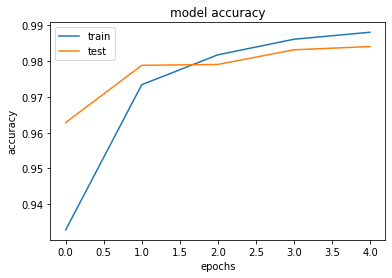

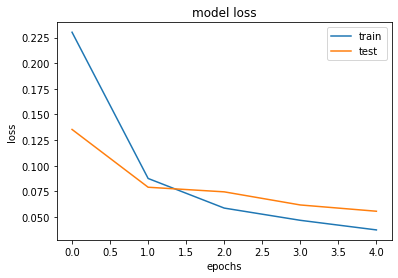

In [9]:
# plotting the train test plot
fig = plt.figure()
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'])
fig.show()

fig = plt.figure()
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'])
fig.show()

# The graph shows over fitting after epoch 1 thus training can be stopped at epoch 1

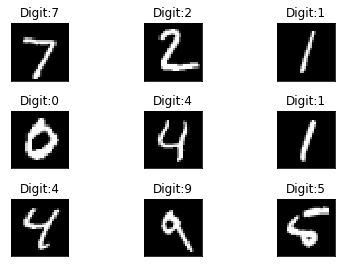

In [12]:
# Even though the model is over fitted it gives good result cuz the dataset is vast and less complex
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(np.reshape(x_test[i],(x_test[i].shape[0],x_test.shape[1])),cmap='gray',interpolation='none')
  y_pred = model.predict(np.reshape(x_test[i],(1,x_test[i].shape[0],x_test[i].shape[1],x_test[i].shape[2])))
  plt.title('Digit:'+str(np.argmax(y_pred[0])))
  #print(y_pred[0])
  plt.xticks([])
  plt.yticks([])
fig.show()